<a href="https://colab.research.google.com/github/Priyo-prog/Time-series-analysis/blob/main/Intoduction/Introduction_to_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Time-series

## Import packages

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import the data

In [23]:
## Mount the drive for fetching the data
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [24]:
## load the dataset
raw_csv_data = pd.read_csv('/content/drive/MyDrive/Data Science/Time Series/Index2018.csv')
raw_csv_data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [25]:
## Copy the original data
df_comp = raw_csv_data.copy()

In [26]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [27]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Plotting the data

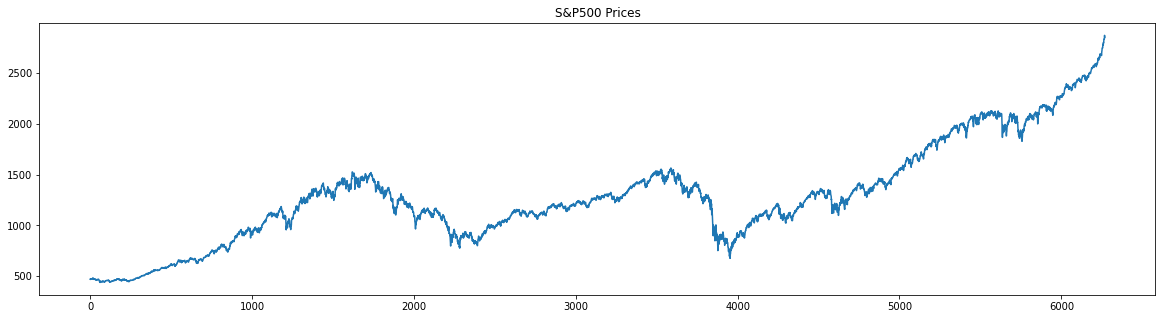

In [28]:
df_comp.spx.plot(figsize=(20,5), title="S&P500 Prices")
plt.show()

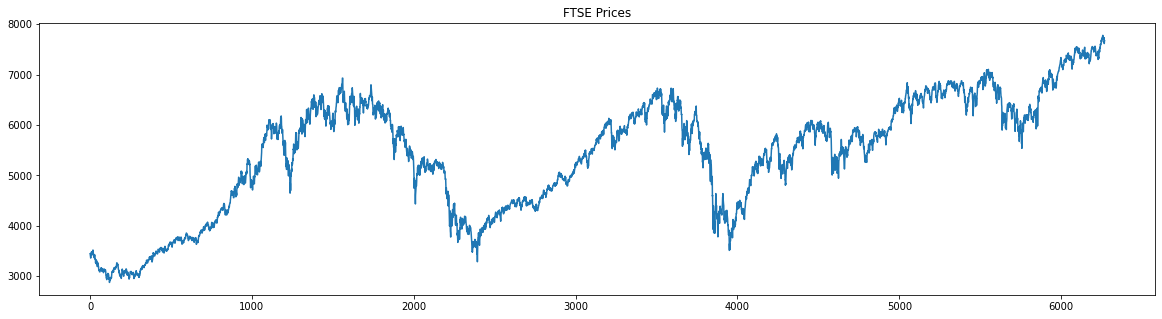

In [29]:
df_comp.ftse.plot(figsize=(20,5), title="FTSE Prices")
plt.show()

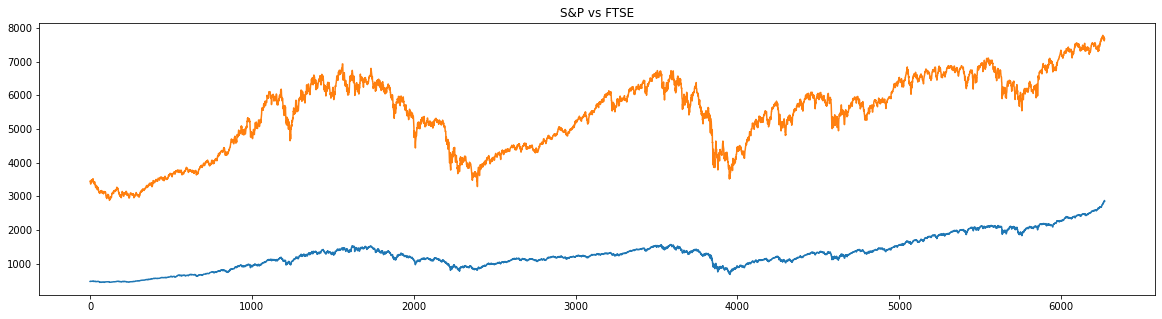

In [30]:
df_comp.spx.plot(figsize=(20,5), title="S&P500 Prices")
df_comp.ftse.plot(figsize=(20,5), title="FTSE Prices")
plt.title("S&P vs FTSE")
plt.show()

## The Quantile Quantile(QQ) Plot

Used to determine whether a data set is distributed in certain way

In [31]:
import scipy.stats
import pylab

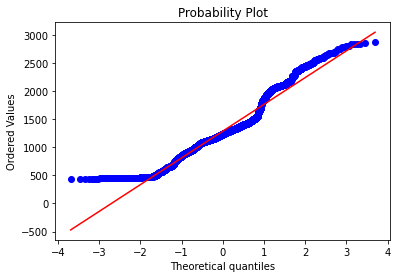

In [32]:
scipy.stats.probplot(df_comp.spx, plot = pylab)
pylab.show()

## Formatting Date for Time-series analysis

The function **to_datetime assumes** that we are plugging in a string in **mm/dd/yy** form

In [33]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)

In [34]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [35]:
df_comp.date.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    6269
unique                   6269
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

## Setting the Index

Each value should correspond to a time period. We often wish to examine specific chunks of data between two concrete dates. We need to use the associated time periods as indices. We achieve this by using a method of **pandas** called **set_index**

In [36]:
df_comp.set_index("date", inplace=True)
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


Observe that there is **NO number index** column in the above dataframe, instead it is replaced by the **date** column.
Once **"date"** becomes an index, we no longer save it's values as a separate attribute in the dataframe.

## Setting the Desired Frequency

To get the dataset in desired frequency of time period we use the method **asfreq()**. The values this arguement it can take are specific letters of the alphabet.

Example : **"h"** - hourly
          **"w"** - weekly
          **"d"** - daily
          **"m"** - monthly.
Data measured once per year is **"annual"** rather than **"yearly"**, so we use **"a"** instead of **"y"**.          

In [37]:
df_comp = df_comp.asfreq('d')
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


We have generated new periods which do not have values associated with them. Another pecularity of the data is that it records the closing prices of financial indices, these prices can be recorded **ONLY** in working days. So we are not interested in weekends or holidays. In the above dataset we have included **saturdays** and **sundays**. We need to avoid these days. Fortunately **asfreq()** method also accepts value **b** which indicates **business days**.

In [38]:
df_comp = df_comp.asfreq('b') # avoiding the weekends
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Handling Missing data

Increasing the frequency of the time period sometimes leads to missing data in the dataset.

In [39]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

We will use **"fillna()"** to go through our dataframe and fill the missing values.

There are several ways we can fill up the missing values :

* **Front Filling** - Assign the values of the previous period.
* **Back Filling** - Assign the value for the next period.
* **Assign the same value** - Assign the average to all the missing values within the time series.

We can use one or combination of methods. usually filling up the missing values with the **mean** is bad approach for the time-series because there are underlying **time variants** patterns in the data. This approach is used when the data fluctuates heavily around the mean from first to last day.

In [41]:
df_comp.spx = df_comp.spx.fillna(method='ffill')
df_comp['spx'].head()

date
1994-01-07    469.90
1994-01-10    475.27
1994-01-11    474.13
1994-01-12    474.17
1994-01-13    472.47
Freq: B, Name: spx, dtype: float64